# Bike Sharing Assignnment 

Importing requisite Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

Importing the Data

In [2]:
bike_data = pd.read_csv('day.csv')

Data Exploration

In [3]:
bike_data.shape

(730, 16)

In [4]:
bike_data.describe()
bike_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Since no missing data, data imputation is not required

In [7]:
bike_data.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [8]:
bike_data.drop_duplicates(inplace=True)

In [9]:
bike_data.shape

(730, 16)

No duplicated found and the total rows constant

Based on the data dictionary we have to encode a few columns which has numeric values

In [10]:
bike_data.season = bike_data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_data.month = bike_data.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_data.weekday = bike_data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_data.weathersit = bike_data.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [11]:
bike_data.head(5)

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Data Visualisation - Categorical Variable

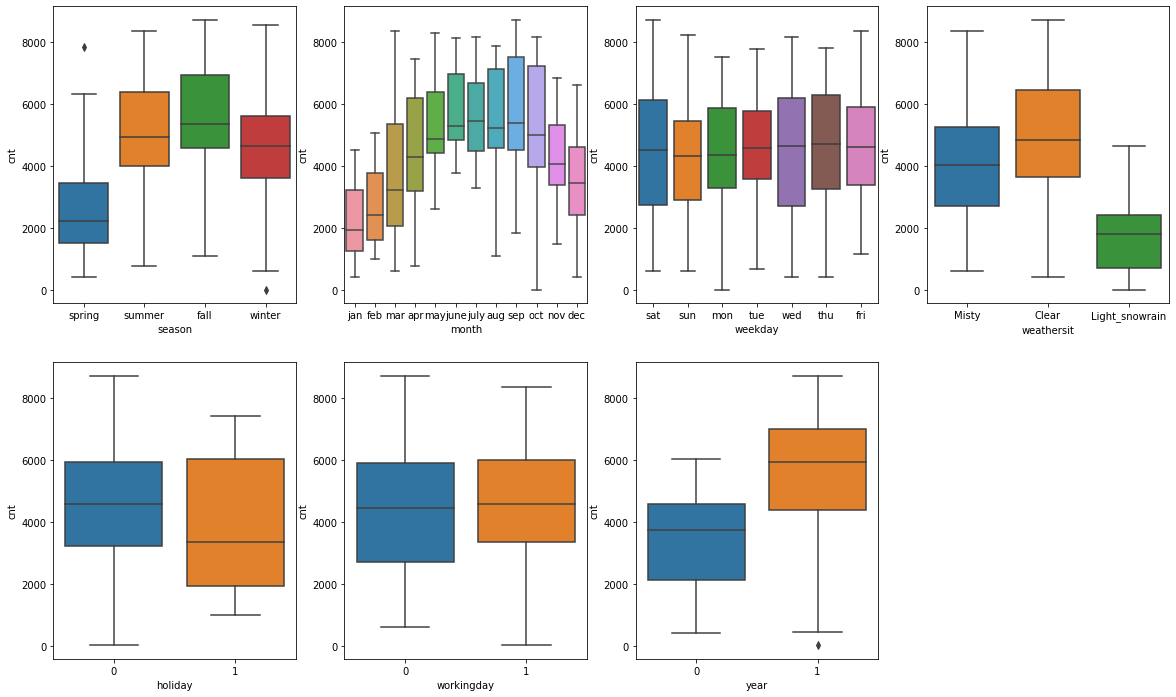

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = bike_data)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bike_data)
plt.show()

1. Majority of bikes hired on working day / non holiday
2. less bikes hired in spring & max in summmer /fall & their corresponding months
3. Light snow/rain has lower bike rentals
4. 2019 has more rentals showing growth in bike uptakes

Data Visualisation - Numerical Variable

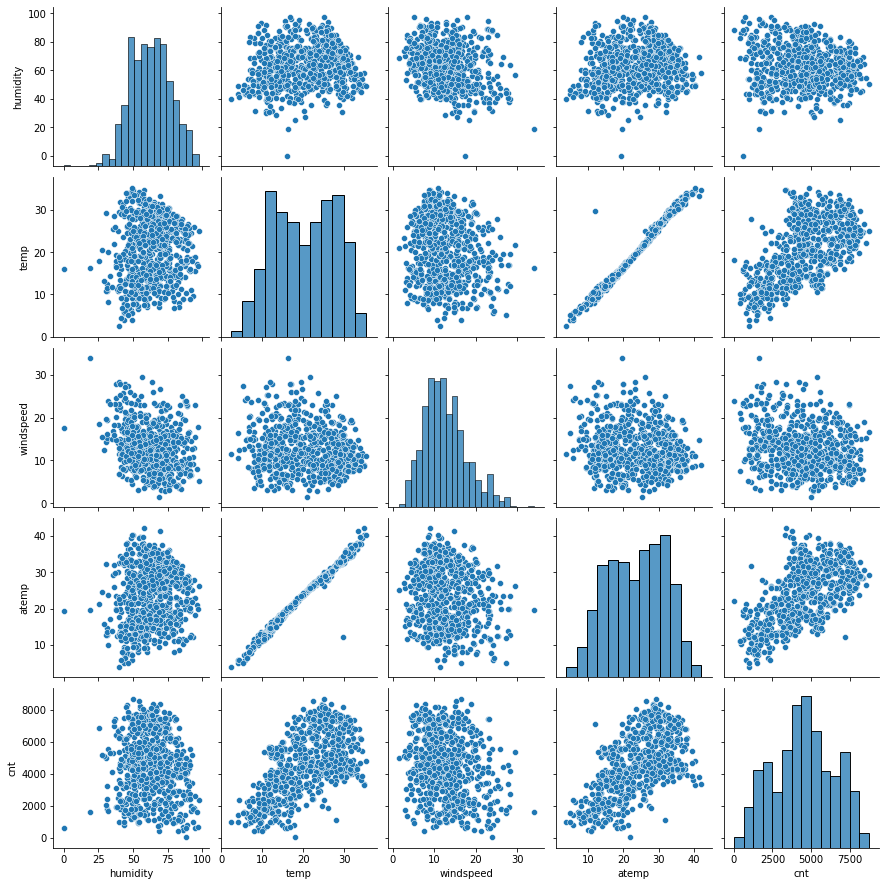

In [13]:
sns.pairplot(data=bike_data,vars=['humidity','temp','windspeed','atemp','cnt'])
plt.show()

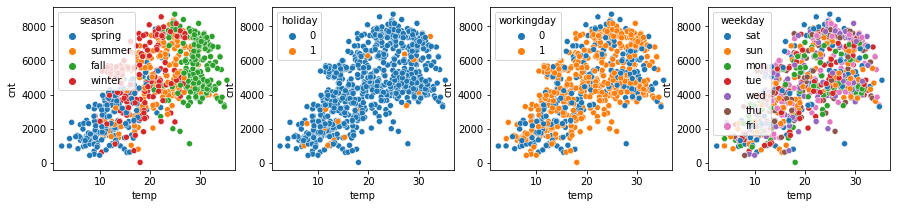

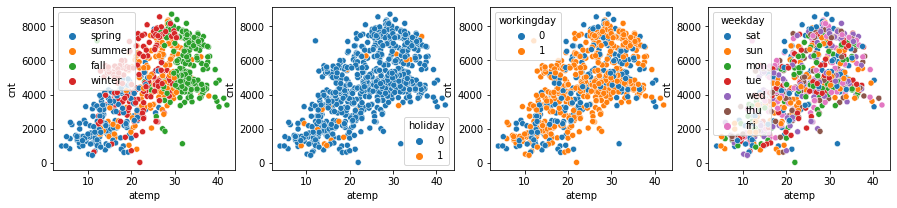

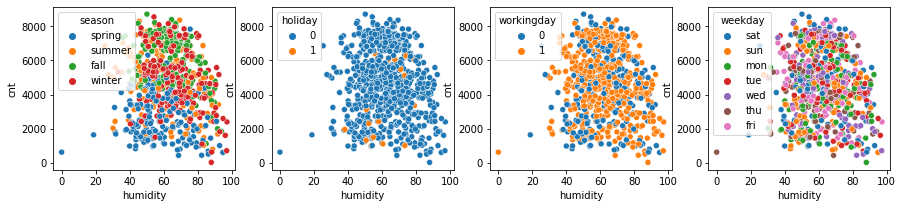

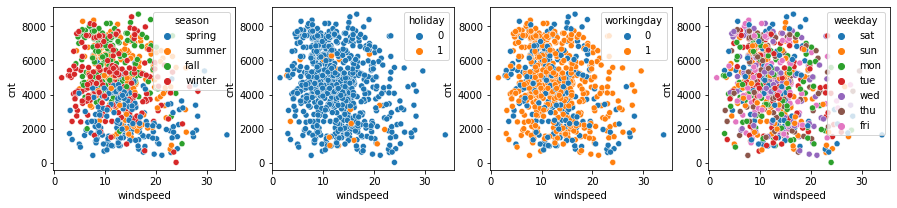

In [14]:
#checking relation between numberic and categorical variables
CATEGORICAL_COLUMNS=['season', 'year', 'month', 'holiday', 'weekday','workingday', 'weathersit']
NUMERICAL_COLUMNS=['temp','atemp','humidity','windspeed']
for i, column in enumerate(NUMERICAL_COLUMNS):
    fig, axs = plt.subplots(ncols=4, figsize=(15, 3))
    sns.scatterplot(bike_data, x=column, y='cnt',  hue="season",  ax=axs[0])
    sns.scatterplot(bike_data, x=column, y='cnt',  hue="holiday",  ax=axs[1])
    sns.scatterplot(bike_data, x=column, y='cnt',  hue="workingday",  ax=axs[2])
    sns.scatterplot(bike_data, x=column, y='cnt',  hue="weekday",  ax=axs[3])

Checking for Multicollinearity 

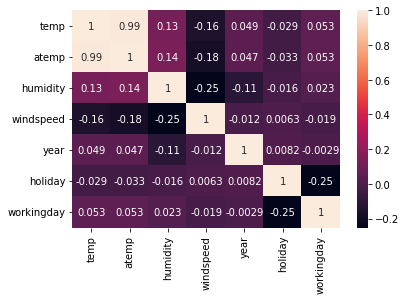

In [15]:
sns.heatmap(bike_data[NUMERICAL_COLUMNS + CATEGORICAL_COLUMNS].corr(), annot=True)

atemp and temp has extremely high correlation and hence 1 will be retained based on p-value and VIF

Dummy variable needs to be prepared for the categorigal variables

In [16]:
months_df=pd.get_dummies(bike_data.month,drop_first=True)
weekdays_df=pd.get_dummies(bike_data.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike_data.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike_data.season,drop_first=True)

In [17]:
months_df.head(5)

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [18]:
weekdays_df.head(5)

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [19]:
weathersit_df.head(5)

,Light_snowrain,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [20]:
seasons_df.head(5)

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [21]:
bike_data1 = pd.concat([bike_data,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [22]:
bike_data1.head(5)

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,1,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,...,1,0,0,0,0,0,1,1,0,0
1,2,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,...,0,1,0,0,0,0,1,1,0,0
2,3,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,...,0,0,0,0,0,0,0,1,0,0
3,4,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,...,0,0,0,1,0,0,0,1,0,0
4,5,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,...,0,0,0,0,1,0,0,1,0,0


In [23]:
bike_data1.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
#dropping the mother column for the dummies

bike_data1.shape

(730, 34)

In [24]:
bike_data1.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
#dropping unwanted columns

Splitting the Data into Training and Testing Sets

In [135]:
np.random.seed(0)
bike_data_train, bike_data_test = train_test_split(bike_data1, train_size = 0.7, random_state = 100)

In [26]:
bike_data_train.shape

(510, 30)

In [27]:
bike_data_test.shape

(220, 30)

Scaling the variables in training dataset

In [28]:
scaler = MinMaxScaler()
num_vars = ['temp','atemp','humidity','windspeed','cnt']
bike_data_train[num_vars] = scaler.fit_transform(bike_data_train[num_vars])

In [129]:
bike_data_train.head(5)

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
221,0,0,1,0.881625,0.795343,0.436161,0.395618,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
244,0,0,1,0.727945,0.690103,0.747643,0.244515,0.541302,0,0,...,0,0,0,0,0,0,1,0,0,0
441,1,0,0,0.515079,0.505273,0.832905,0.211840,0.675334,0,0,...,0,1,0,0,0,0,1,1,0,0
112,0,0,0,0.499503,0.487055,0.913025,0.471926,0.461804,0,0,...,1,0,0,0,0,0,1,0,1,0
524,1,0,0,0.812053,0.747280,0.449443,0.255430,0.860101,0,0,...,1,0,0,0,0,0,0,0,1,0


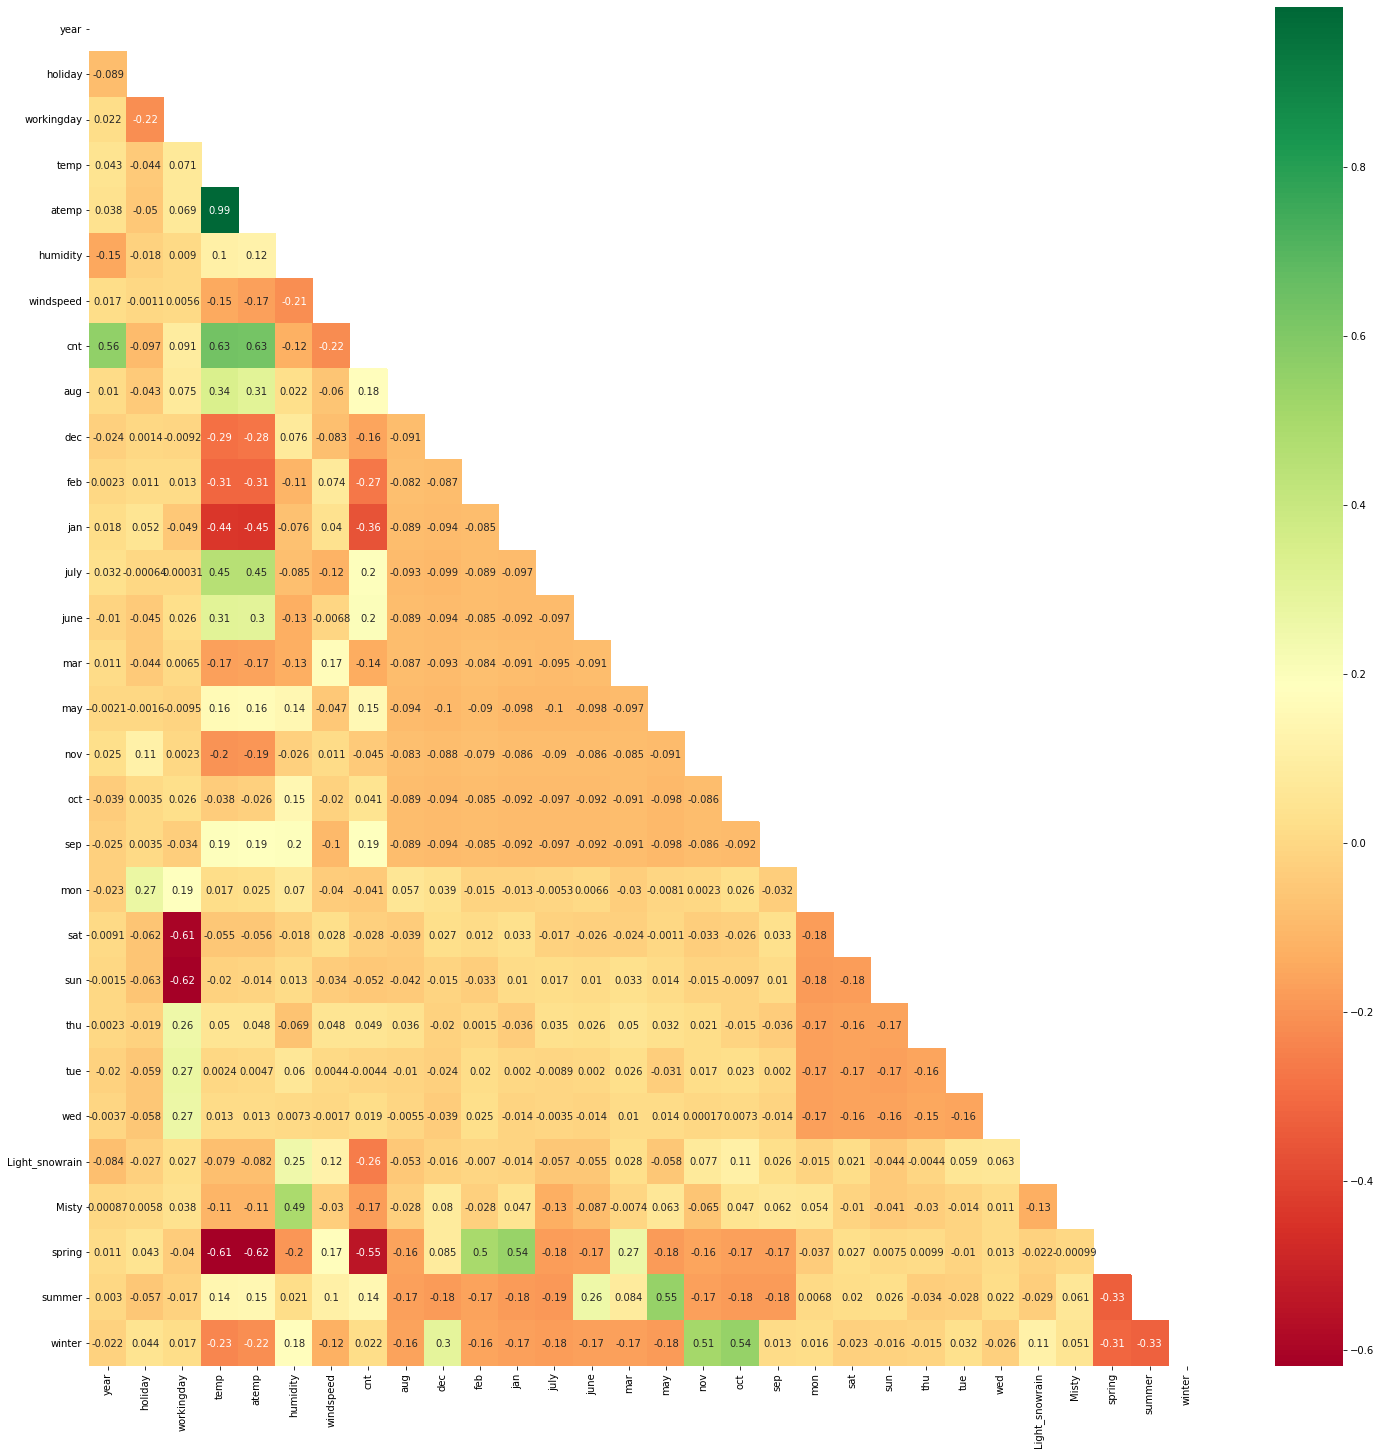

In [30]:
#Checking correlation of all variables
plt.figure(figsize = (25,25))
matrix = np.triu(bike_data_train.corr())
sns.heatmap(bike_data_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

Misty and humidity show correlation. 
cnt has correlation with year variable and temp. 
Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

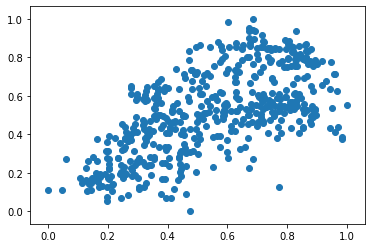

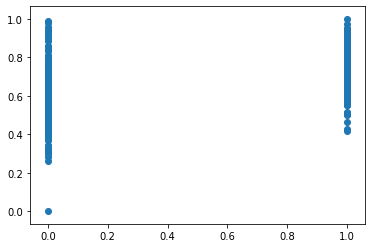

In [31]:
plt.scatter(bike_data_train.temp, bike_data_train.cnt)
plt.show()
plt.scatter(bike_data_train.Misty, bike_data_train.humidity)
plt.show()
#other correlation is difficult to show

# Model Building 

In [87]:
y_train = bike_data_train.cnt
X_train = bike_data_train.drop('cnt', axis=1)

In [88]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [89]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', False, 13),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 5),
 ('dec', True, 1),
 ('feb', False, 3),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 8),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 6),
 ('sep', True, 1),
 ('mon', False, 4),
 ('sat', False, 9),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 15),
 ('wed', False, 10),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 14),
 ('winter', True, 1)]

In [90]:
#Checking variables selected and rejected by RFE
col = X_train.columns[rfe.support_]
print(col)

X_train.columns[~rfe.support_]

Index(['year', 'temp', 'atemp', 'humidity', 'windspeed', 'dec', 'july', 'may',
       'nov', 'sep', 'sun', 'Light_snowrain', 'Misty', 'spring', 'winter'],
      dtype='object')


Index(['holiday', 'workingday', 'aug', 'feb', 'jan', 'june', 'mar', 'oct',
       'mon', 'sat', 'thu', 'tue', 'wed', 'summer'],
      dtype='object')

VIF Clculation for the variables

In [91]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 


X_train_rfe = X_train[col]

calculateVIF(X_train_rfe)

,Features,VIF
2,atemp,351.87
1,temp,350.38
3,humidity,24.59
4,windspeed,4.39
14,winter,2.92
13,spring,2.67
12,Misty,2.38
0,year,1.95
8,nov,1.68
6,july,1.59


since atemp has high VIF dropping the variable

In [92]:
X_train = bike_data_train.drop(['cnt', 'atemp'], axis=1)

In [93]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', False, 11),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 4),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 7),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 5),
 ('sep', True, 1),
 ('mon', False, 3),
 ('sat', False, 8),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 14),
 ('wed', False, 9),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 12),
 ('winter', True, 1)]

In [94]:
#Checking variables selected and rejected by RFE
col = X_train.columns[rfe.support_]
print(col)

X_train.columns[~rfe.support_]
X_train_rfe = X_train[col]
calculateVIF(X_train_rfe)

Index(['year', 'temp', 'humidity', 'windspeed', 'dec', 'jan', 'july', 'may',
       'nov', 'sep', 'sun', 'Light_snowrain', 'Misty', 'spring', 'winter'],
      dtype='object')


,Features,VIF
2,humidity,25.23
1,temp,16.56
3,windspeed,4.33
13,spring,3.05
14,winter,2.90
12,Misty,2.38
0,year,1.96
5,jan,1.70
8,nov,1.69
6,july,1.60


Humidity has high VIF followed by temp, but we will check the p-values in the model before deciding 

In [95]:
#Building the 1st Model
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.3
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          1.37e-183
Time:                        17:21:30   Log-Likelihood:                 516.83
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     494   BIC:                            -933.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3755      0.032     11.

In [96]:
#Humidity had very high VIF but good P-value hence dropping and checking the effect
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.46
2,windspeed,4.31
13,winter,2.42
12,spring,2.38
0,year,1.95
7,nov,1.67
4,jan,1.63
11,Misty,1.57
5,july,1.56
3,dec,1.46


In [97]:
#buidling 2nd reg model to check
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     173.6
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          1.28e-180
Time:                        17:21:38   Log-Likelihood:                 507.03
No. Observations:                 510   AIC:                            -984.1
Df Residuals:                     495   BIC:                            -920.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2919      0.026     11.

In [98]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.41
2,windspeed,4.31
12,winter,2.39
0,year,1.94
11,spring,1.75
6,nov,1.67
4,july,1.56
10,Misty,1.55
3,dec,1.40
5,may,1.30


In [99]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.5
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          6.45e-181
Time:                        17:21:44   Log-Likelihood:                 505.02
No. Observations:                 510   AIC:                            -982.0
Df Residuals:                     496   BIC:                            -922.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2790      0.025     11.

In [100]:
# Dropping Dec basis high P-value
X_train_new = X_train_new.drop(['dec'], axis = 1)


calculateVIF(X_train_new)

,Features,VIF
1,temp,5.40
2,windspeed,4.31
0,year,1.94
11,winter,1.90
10,spring,1.69
3,july,1.56
9,Misty,1.55
5,nov,1.51
4,may,1.30
6,sep,1.26


In [101]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     199.9
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          2.10e-181
Time:                        17:21:50   Log-Likelihood:                 503.42
No. Observations:                 510   AIC:                            -980.8
Df Residuals:                     497   BIC:                            -925.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2701      0.024     11.

In [102]:
X_train_new = X_train_new.drop(['may'], axis = 1)

# Drop has tolerable P value but dropping to check the effect
calculateVIF(X_train_new)

,Features,VIF
1,temp,4.93
2,windspeed,4.31
0,year,1.94
10,winter,1.83
9,spring,1.65
8,Misty,1.53
4,nov,1.51
3,july,1.46
5,sep,1.21
6,sun,1.17


In [103]:
#Rebuilding the model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.7
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          1.93e-181
Time:                        17:21:56   Log-Likelihood:                 500.71
No. Observations:                 510   AIC:                            -977.4
Df Residuals:                     498   BIC:                            -926.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2793      0.024     11.

We can cosider the above model i.e lr_7 due to the below reasons, 
1. Very low multi collinearity
2. Low P values for all Predictors
3. High F-statistic of 215.7
4. P-value for model 1.93e-181 is almost 0 

In [104]:
# Checking the parameters & their coefficient values
lr_6.params

const             0.279291
year              0.233933
temp              0.413573
windspeed        -0.103300
july             -0.070613
nov              -0.044654
sep               0.051715
sun              -0.035895
Light_snowrain   -0.264253
Misty            -0.082924
spring           -0.132914
winter            0.043077
dtype: float64

# Residual Analysis of the train data and validation

In [105]:
X_train_lm_6

,const,year,temp,windspeed,july,nov,sep,sun,Light_snowrain,Misty,spring,winter
221,1.0,0,0.881625,0.395618,0,0,0,0,0,0,0,0
244,1.0,0,0.727945,0.244515,0,0,1,0,0,1,0,0
441,1.0,1,0.515079,0.211840,0,0,0,1,0,1,1,0
112,1.0,0,0.499503,0.471926,0,0,0,0,0,1,0,0
524,1.0,1,0.812053,0.255430,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
373,1.0,1,0.205644,0.141752,0,0,0,0,0,1,1,0
328,1.0,0,0.393589,0.141742,0,1,0,0,0,0,0,1
249,1.0,0,0.672912,0.137045,0,0,1,0,1,0,0,0
15,1.0,0,0.214989,0.366000,0,0,0,1,0,0,1,0


In [106]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

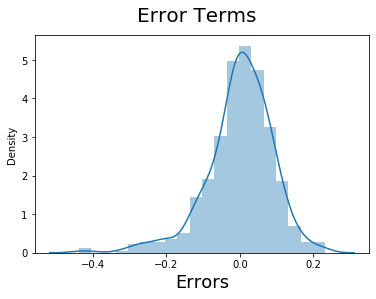

In [107]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error term normally distributed around 0

In [108]:
calculateVIF(X_train_new)
# VIF check

,Features,VIF
1,temp,4.93
2,windspeed,4.31
0,year,1.94
10,winter,1.83
9,spring,1.65
8,Misty,1.53
4,nov,1.51
3,july,1.46
5,sep,1.21
6,sun,1.17


In [109]:
X_train_new.shape

(510, 11)

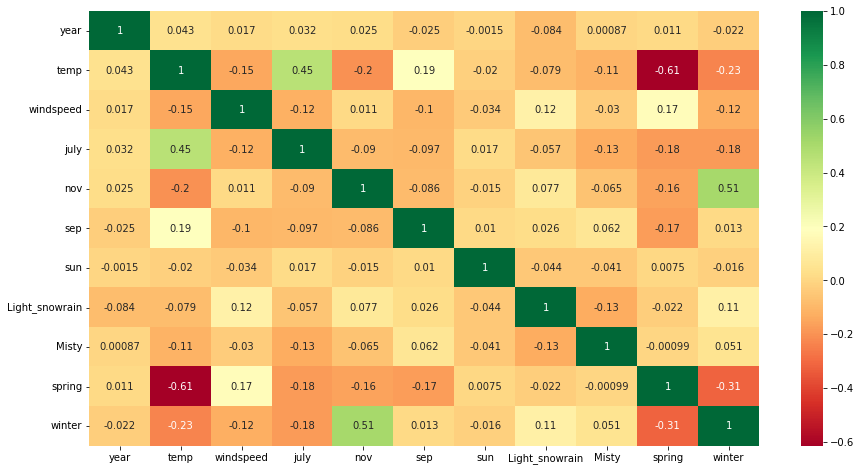

In [110]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

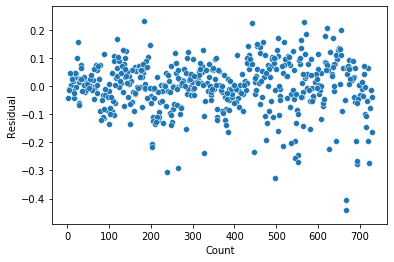

In [111]:
# Check for Homoscadacity
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(residual)
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No Pattern observed

# Predictions Using the Final Model

In [138]:
bike_data_test.head(5)
bike_data_test1=bike_data_test

In [139]:
#Applying the scaling used for the train on the test
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
bike_data_test[num_vars] = scaler.transform(bike_data_test[num_vars])
bike_data_test.head(5)

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.655956,0.098119,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.608826,0.179101,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.835904,0.389368,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.436161,0.395618,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.313625,0.626117,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [140]:
y_test = bike_data_test.cnt
X_test = bike_data_test.drop(['cnt', 'atemp'], axis=1)

In [141]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [142]:
y_pred = lr_6.predict(X_test_lm_6)

In [143]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8169

Text(0, 0.5, 'y_pred')

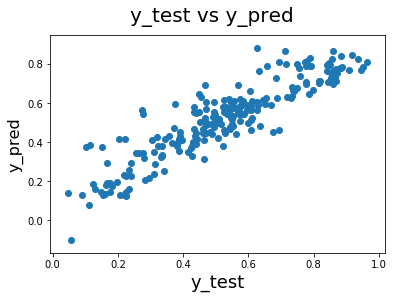

In [144]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [146]:
round(lr_6.params,4)

const             0.2793
year              0.2339
temp              0.4136
windspeed        -0.1033
july             -0.0706
nov              -0.0447
sep               0.0517
sun              -0.0359
Light_snowrain   -0.2643
Misty            -0.0829
spring           -0.1329
winter            0.0431
dtype: float64

In [147]:
# Calculating Adjusted-R^2 
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8072


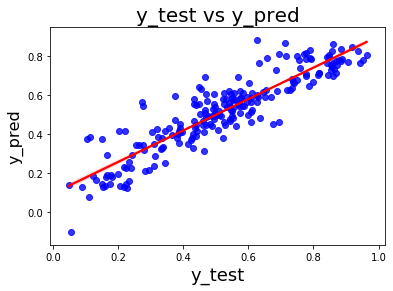

In [148]:
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.827
- Test dataset R^2           : 0.8169
- Train dataset Adjusted R^2 : 0.823    
- Test dataset Adjusted R^2  : 0.8072

# Demand of bikes depend on year, temp, windspeed, july, nov, sep, sunday,Light_snowrain, Misty, spring, summer and winter.